In [20]:
with open("run.out") as f:
    content = f.readlines()

sizes = []
types = []
runs = {}

for run in content:
    if len(run) == 1 or run.startswith("#"):
        continue

    type_data, time = run.split(", ")
    algorithm, size = type_data.split(": ")

    time = float(time[6:-2])
    size = int(size.split("x")[0])

    if size  not in sizes:
        sizes.append(size)

    if algorithm not in types:
        types.append(algorithm)

    if algorithm not in runs:
        runs[algorithm] = []
    runs.get(algorithm).append(time)

print(runs, sizes, types)

{'naive': [0.3524, 2.8191, 9.9958, 21.7125, 57.387, 106.7012, 207.492, 230.175, 445.84], 'seq': [0.325, 2.552, 8.8686, 20.6917, 39.9139, 70.5438, 111.6588, 167.2738, 237.506], 'omp-4': [0.1042, 0.6891, 2.2743, 5.3166, 10.5051, 18.3943, 29.6172, 43.9955, 63.3926], 'omp-16': [0.0417, 0.2047, 0.6954, 1.554, 2.9981, 5.0649, 8.1998, 11.8976, 17.4656], 'omp-25': [0.035, 0.1537, 0.4904, 1.1318, 2.1481, 3.7113, 5.9404, 8.5143, 12.5136], 'omp-36': [0.0323, 0.1245, 0.3539, 0.7761, 1.5294, 2.6717, 4.3463, 6.2756, 9.3794], 'omp-38': [0.0348, 0.1176, 0.36, 0.773, 1.5316, 2.6914, 4.3926, 6.3686, 9.4285], 'mpi-4': [0.0867, 0.6937, 2.3613, 5.5322, 10.7567, 18.8341, 29.7814, 44.1214, 62.8241], 'mpi-16': [0.0238, 0.1803, 0.6043, 1.4177, 2.7672, 4.832, 7.6091, 11.2813, 15.9732], 'mpi-25': [0.0155, 0.1152, 0.3811, 0.9061, 1.7543, 3.0392, 4.7951, 7.2401, 10.2342], 'mpi-36': [0.0114, 0.0824, 0.2743, 0.6301, 1.2379, 2.1213, 3.3741, 5.0314, 7.2113], 'mpi-49': [0.0091, 0.062, 0.2039, 0.4733, 0.9077, 1.5811, 2.

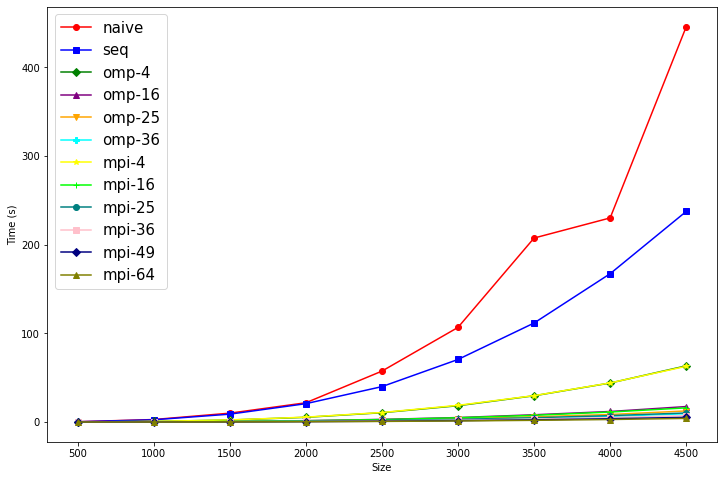

In [30]:
import matplotlib.pyplot as plt

# Define the x-axis values
x = sizes

# Define the line colors and markers
colors = ['red', 'blue', 'green', 'purple', 'orange', 'cyan', 'magenta', 'yellow', 'lime', 'teal', 'pink', 'navy', 'olive']
markers = ['o', 's', 'D', '^', 'v', 'P', 'X', '*', '+']
markers *= 2


# Create a figure and axis object
fig, ax = plt.subplots(figsize=(12, 8))

# Iterate over the types and plot the corresponding runs
for i, t in enumerate(types):
    if t == "omp-38":
        continue
    ax.plot(x[:len(runs[t])], runs[t], label=t, color=colors[i], marker=markers[i])

# Set the axis labels and title
ax.set_xlabel('Size')
ax.set_ylabel('Time (s)')
# ax.set_title('Comparison of runtimes by implementation type and size')

# Set the x-axis tick values to only show available sizes
ax.set_xticks([500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500])

# Add a legend
ax.legend(fontsize=15)

# Show the plot
plt.show()


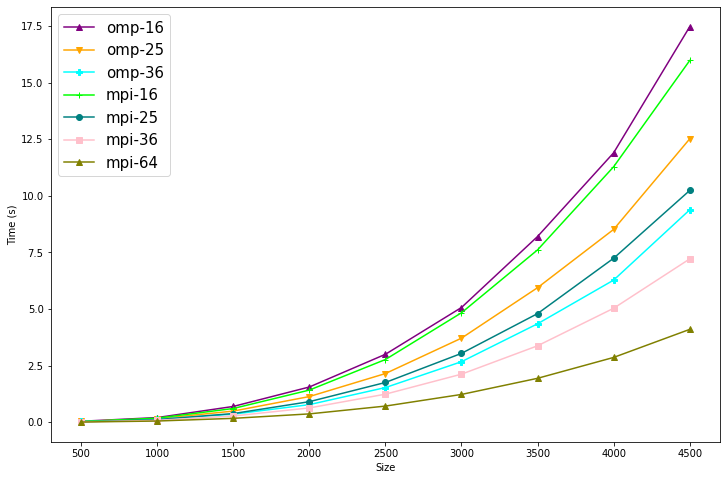

In [29]:
import matplotlib.pyplot as plt

# Define the x-axis values
x = sizes

lookup = ["omp-16", "mpi-16", "mpi-25", "mpi-36", "mpi-49", "mpi-64"]
# Define the line colors and markers
colors = ['red', 'blue', 'green', 'purple', 'orange', 'cyan', 'magenta', 'yellow', 'lime', 'teal', 'pink', 'navy', 'olive']
markers = ['o', 's', 'D', '^', 'v', 'P', 'X', '*', '+']
markers *= 2

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(12, 8))

# Iterate over the types and plot the corresponding runs
for i, t in enumerate(types):
    # if t not in lookup:
    #     continue
    if not t.startswith("mpi") and not t.startswith("omp") or "-4" in t or t == "omp-38":
        continue
    ax.plot(x[:len(runs[t])], runs[t], label=t, color=colors[i], marker=markers[i])

# Set the axis labels and title
ax.set_xlabel('Size')
ax.set_ylabel('Time (s)')
# ax.set_title('Comparison of runtimes by implementation type and size')

# Set the x-axis tick values to only show available sizes
ax.set_xticks([500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500])

# Add a legend
ax.legend(fontsize=15)

# Show the plot
plt.show()


In [72]:
import plotly.graph_objects as go

# Define the x-axis values
x = sizes

# Define the line colors and markers
colors = ['red', 'blue', 'green', 'purple', 'orange']
markers = ['circle', 'square', 'diamond', 'triangle-up', 'triangle-down']

# Create a figure object
fig = go.Figure()

# Iterate over the types and plot the corresponding runs
for i, t in enumerate(types):
    fig.add_trace(go.Scatter(x=x[:len(runs[t])], y=runs[t], mode='lines+markers', name=t, line=dict(color=colors[i]), marker=dict(symbol=markers[i])))

# Set the axis labels and title
fig.update_layout(xaxis_title='Size', yaxis_title='Time (s)')

# Set the x-axis tick values to only show available sizes
fig.update_xaxes(tickvals=x)

# Add a legend
fig.update_layout(legend=dict(font=dict(size=15)))

# Show the plot
fig.show()

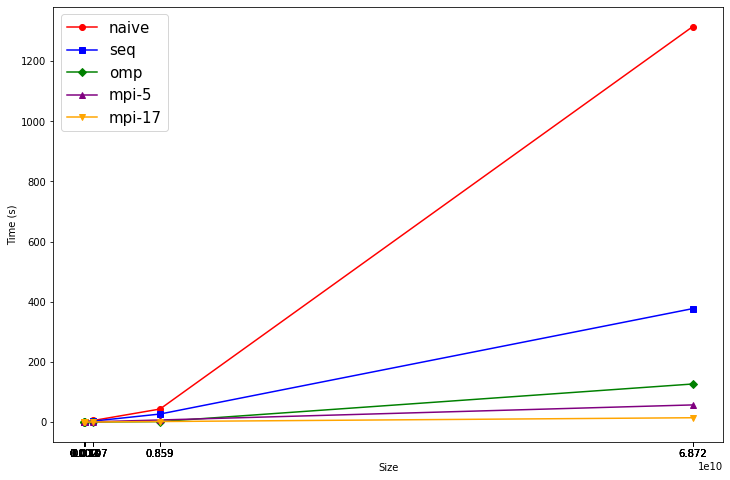

In [63]:
import matplotlib.pyplot as plt

# Define the x-axis values
x = sizes

# Define the line colors and markers
colors = ['red', 'blue', 'green', 'purple', 'orange']
markers = ['o', 's', 'D', '^', 'v']

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(12, 8))

# Iterate over the types and plot the corresponding runs
for i, t in enumerate(types):
    ax.plot(x[:len(runs[t])], runs[t], label=t, color=colors[i], marker=markers[i])

# Set the axis labels and title
ax.set_xlabel('Size')
ax.set_ylabel('Time (s)')
# ax.set_title('Comparison of runtimes by implementation type and size')

# Set the x-axis tick values to only show available sizes
ax.set_xticks(x)

# Add a legend
ax.legend(fontsize=15)

# Show the plot
plt.show()


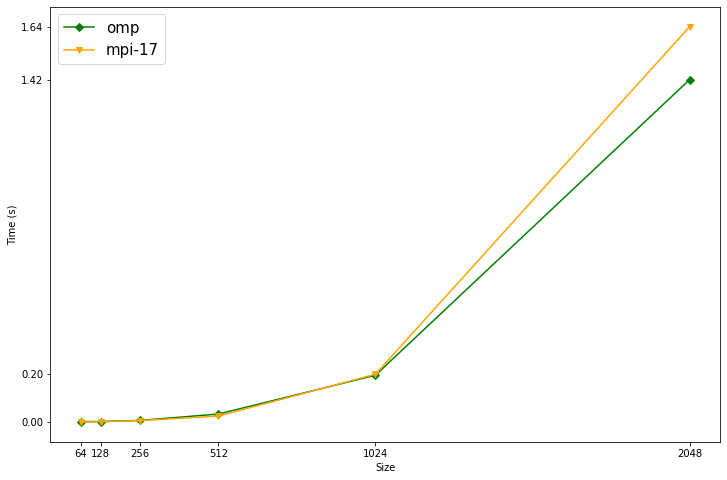

In [53]:
import matplotlib.pyplot as plt

# Define the x-axis values
x = sizes

# Define the line colors and markers
lookup = ["omp", "mpi-17"]
colors = ['red', 'blue', 'green', 'purple', 'orange']
markers = ['o', 's', 'D', '^', 'v']

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(12, 8))

y_ticks = set()
y_ticks.add(0)

# Iterate over the types and plot the corresponding runs
for i, t in enumerate(types):
    if t not in lookup:
        continue

    y_ticks.add(round(runs[t][-2], 1))
    y_ticks.add(round(runs[t][-1], 2))
    ax.plot(x, runs[t], label=t, color=colors[i], marker=markers[i])

# Set the axis labels and title
ax.set_xlabel('Size')
ax.set_ylabel('Time (s)')
# ax.set_title('Comparison of runtimes by implementation type and size')

# Set the x-axis tick values to only show available sizes
ax.set_xticks(x)


ax.set_yticks(list(y_ticks))

# Add a legend
ax.legend(fontsize=15)

# Show the plot
plt.show()
